# 15. [Multiple Regression 多元迴歸](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/multiple_regression.py)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division
from collections import Counter
from functools import partial
from linear_algebra import dot, vector_add
from statistics import median, standard_deviation
from probability import normal_cdf
from gradient_descent import minimize_stochastic
from simple_linear_regression import total_sum_of_squares
import math, random

In [3]:
def predict(x_i, beta):
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)
    
def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

def squared_error_gradient(x_i, y_i, beta):
    """the gradient corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta)
            for x_ij in x_i]

In [4]:
def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error, 
                               squared_error_gradient, 
                               x, y, 
                               beta_initial, 
                               0.001)        

In [5]:
def multiple_r_squared(x, y, beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
                                for x_i, y_i in zip(x, y))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(y)

In [6]:
def bootstrap_sample(data):
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]  # 隨機抽樣
        
def bootstrap_statistic(data, stats_fn, num_samples):
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    # 取 num_samples 個樣本，並對每個樣本做 stats_fn 的處理，傳回 num_samples 個結果
    return [stats_fn(bootstrap_sample(data)) 
            for _ in range(num_samples)]

In [7]:
# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 of them near 0, 50 of them near 200
far_from_100 = ([99.5 + random.random()] + 
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])

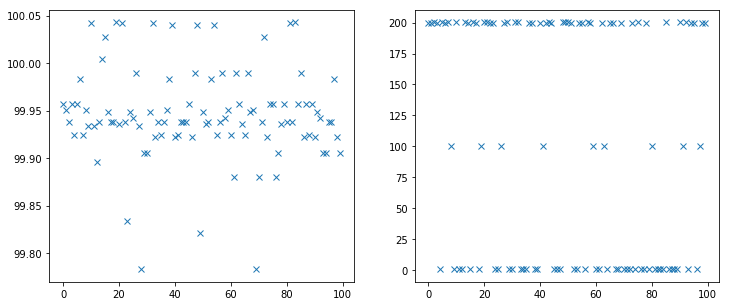

In [8]:
plt.figure(figsize = (12, 5))

plt.subplot(121) 
plt.plot(bootstrap_statistic(close_to_100, median, 100), 'x') #bootstrap_statistic(close_to_100, median, 100))

plt.subplot(122)
plt.plot(bootstrap_statistic(far_from_100, median, 100), 'x');

In [9]:
def estimate_sample_beta(sample):
    x_sample, y_sample = zip(*sample) # magic unzipping trick
    return estimate_beta(x_sample, y_sample)

# H_0: beta = 0, 也就是該項因素沒有影響力
def p_value(beta_hat_j, sigma_hat_j):
    if beta_hat_j > 0:
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

In [10]:
x = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

random.seed(0)
beta = estimate_beta(x, daily_minutes_good) # [30.63, 0.972, -1.868, 0.911]
print("beta", beta)
print("r-squared/套入優度", multiple_r_squared(x, daily_minutes_good, beta)) 

beta [30.619881701311712, 0.9702056472470465, -1.8671913880379478, 0.9163711597955347]
r-squared/套入優度 0.6800074955952597


digression: the bootstrap


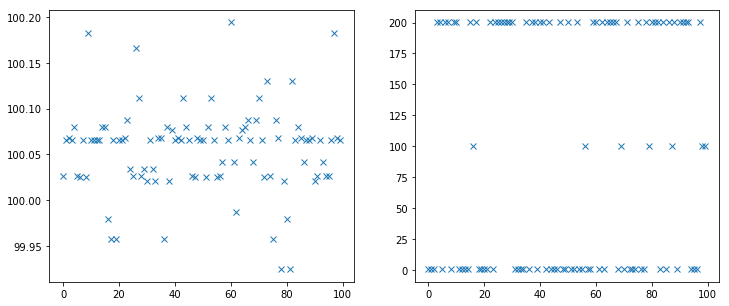

In [11]:
print("digression: the bootstrap")

# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 of them near 0, 50 of them near 200
far_from_100 = ([99.5 + random.random()] + 
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])

plt.figure(figsize = (12, 5))

plt.subplot(121) 
plt.plot(bootstrap_statistic(close_to_100, median, 100), 'x') #bootstrap_statistic(close_to_100, median, 100))

plt.subplot(122)
plt.plot(bootstrap_statistic(far_from_100, median, 100), 'x');

In [12]:
random.seed(0) # so that you get the same results as me

# 從原本的資料集中 重複取樣，取出 100個樣本 並估計 beta值，傳回這 100個 beta 值
bootstrap_betas = bootstrap_statistic(list(zip(x, daily_minutes_good)),
                                      estimate_sample_beta,
                                      100)

# 4個 beta值 各自的 標準差
bootstrap_standard_errors = [standard_deviation([beta[i] for beta in bootstrap_betas])
                             for i in range(4)]
print("beta", beta)
print("bootstrap standard errors", bootstrap_standard_errors)
print()

print("p_value(30.63, 1.174)", p_value(30.63, 1.174)) # p值都很小，應該可以 reject H_0，也就是說 該項元素是有影響性的
print("p_value(0.972, 0.079)", p_value(0.972, 0.079))
print("p_value(-1.868, 0.131)", p_value(-1.868, 0.131))
print("p_value(0.911, 0.990)", p_value(0.911, 0.990)) # p值很大，不能 reject H_0，也就是說 該項元素說不定沒有影響性 

beta [30.619881701311712, 0.9702056472470465, -1.8671913880379478, 0.9163711597955347]
bootstrap standard errors [0.953551702104508, 0.06288763616183773, 0.11722269488203318, 0.8591786495949066]

p_value(30.63, 1.174) 0.0
p_value(0.972, 0.079) 0.0
p_value(-1.868, 0.131) 0.0
p_value(0.911, 0.990) 0.35746719881669264


In [13]:
#
# REGULARIZED REGRESSION
#

# alpha is a *hyperparameter* controlling how harsh the penalty is
# sometimes it's called "lambda" but that already means something in Python
def ridge_penalty(beta, alpha):
    return alpha * dot(beta[1:], beta[1:])

def squared_error_ridge(x_i, y_i, beta, alpha):
    """estimate error plus ridge penalty on beta"""
    return error(x_i, y_i, beta) ** 2 + ridge_penalty(beta, alpha)

def ridge_penalty_gradient(beta, alpha):
    """gradient of just the ridge penalty"""
    return [0] + [2 * alpha * beta_j for beta_j in beta[1:]]

def squared_error_ridge_gradient(x_i, y_i, beta, alpha):
    """the gradient corresponding to the ith squared error term
    including the ridge penalty"""
    return vector_add(squared_error_gradient(x_i, y_i, beta),
                      ridge_penalty_gradient(beta, alpha))

def estimate_beta_ridge(x, y, alpha):
    """use gradient descent to fit a ridge regression
    with penalty alpha"""
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(partial(squared_error_ridge, alpha=alpha), 
                               partial(squared_error_ridge_gradient, 
                                       alpha=alpha), 
                               x, y, 
                               beta_initial, 
                               0.001)

def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])

In [14]:
print("regularization")

random.seed(0)

for alpha in [0.0, 0.01, 0.1, 1, 10]:
    beta = estimate_beta_ridge(x, daily_minutes_good, alpha=alpha)
    print("alpha", alpha)
    print("beta", beta)
    print("dot(beta[1:],beta[1:])", dot(beta[1:], beta[1:]))
    print("r-squared", multiple_r_squared(x, daily_minutes_good, beta))
    print()

regularization
alpha 0.0
beta [30.619881701311712, 0.9702056472470465, -1.8671913880379478, 0.9163711597955347]
dot(beta[1:],beta[1:]) 5.267438780018153
r-squared 0.6800074955952597

alpha 0.01
beta [30.55985204967343, 0.9730655363505671, -1.8624424625144256, 0.9317665551046306]
dot(beta[1:],beta[1:]) 5.2837373774215655
r-squared 0.680010213297079

alpha 0.1
beta [30.894860179735474, 0.9490275238632391, -1.8501720889216575, 0.5325129720515789]
dot(beta[1:],beta[1:]) 4.607360065077926
r-squared 0.6797276241305292

alpha 1
beta [30.666778908554885, 0.908635996761392, -1.6938673046100265, 0.09370161190283018]
dot(beta[1:],beta[1:]) 3.7035858123105934
r-squared 0.6757061537631815

alpha 10
beta [28.372861060795607, 0.7307660860322116, -0.9212163182015426, -0.018495551723207087]
dot(beta[1:],beta[1:]) 1.3830006628491893
r-squared 0.5752138470466858

